Train shape: (1460, 81)


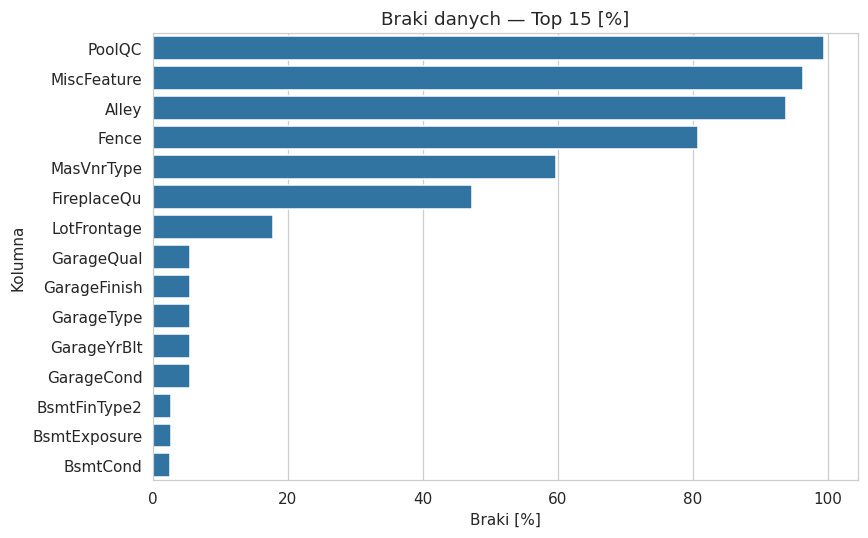

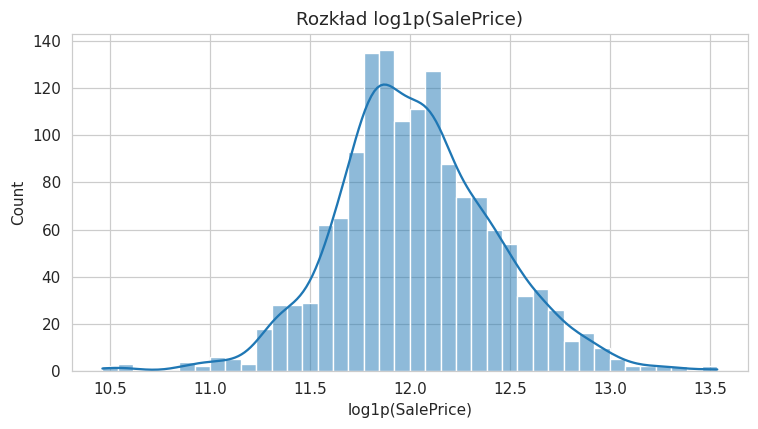

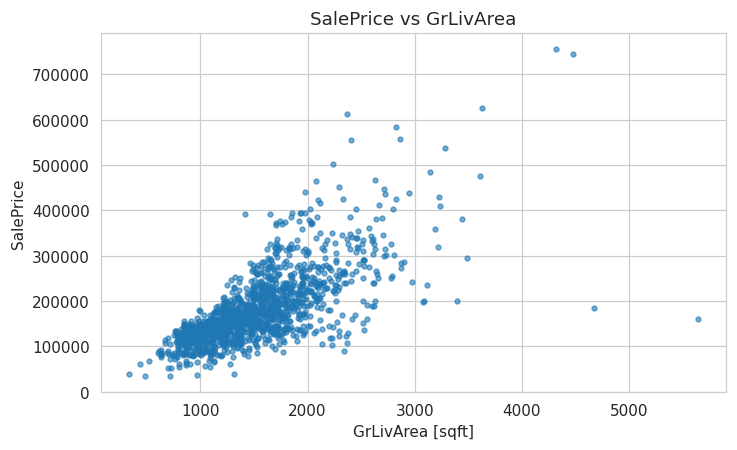

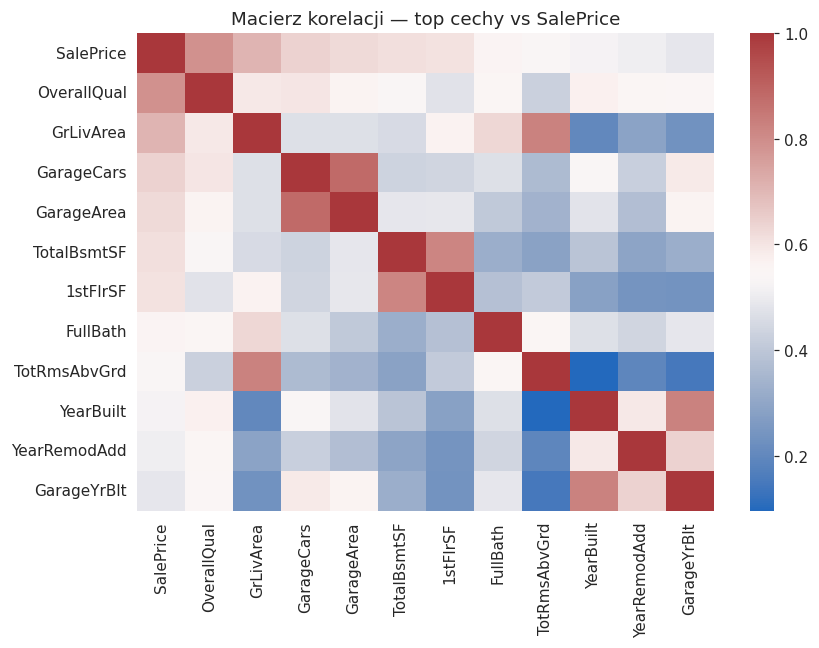

In [3]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 10, 'figure.dpi': 110})

df = pd.read_csv("train.csv")
print("Train shape:", df.shape)

# 1) Braki danych: Top 15
miss = (df.isna().mean().sort_values(ascending=False)*100)
miss = miss[miss>0].head(15)
if len(miss):
    plt.figure(figsize=(8,5))
    sns.barplot(x=miss.values, y=miss.index, orient="h")
    plt.title("Braki danych — Top 15 [%]")
    plt.xlabel("Braki [%]"); plt.ylabel("Kolumna")
    plt.tight_layout(); plt.show()

# 2) Rozkład celu: log1p(SalePrice)
if "SalePrice" in df.columns:
    plt.figure(figsize=(7,4))
    sns.histplot(np.log1p(df["SalePrice"]), bins=40, kde=True)
    plt.title("Rozkład log1p(SalePrice)")
    plt.xlabel("log1p(SalePrice)")
    plt.tight_layout(); plt.show()

# 3) Zależność: SalePrice vs GrLivArea
if {"SalePrice","GrLivArea"}.issubset(df.columns):
    plt.figure(figsize=(6.8,4.2))
    plt.scatter(df["GrLivArea"], df["SalePrice"], s=10, alpha=0.6)
    plt.title("SalePrice vs GrLivArea")
    plt.xlabel("GrLivArea [sqft]"); plt.ylabel("SalePrice")
    plt.tight_layout(); plt.show()

# 4) Heatmapa: top korelacje z SalePrice
num = df.select_dtypes(include=np.number)
if "SalePrice" in num.columns:
    r = num.corr(numeric_only=True)["SalePrice"].abs().sort_values(ascending=False)
    top_feats = r.head(12).index
    plt.figure(figsize=(8,6))
    sns.heatmap(num[top_feats].corr(), cmap="vlag", annot=False)
    plt.title("Macierz korelacji — top cechy vs SalePrice")
    plt.tight_layout(); plt.show()
